In [7]:
from training import *
from analysis import *
from network import *
def plot_input_histogram_2NN(model,
                            test_loader):
    hidden = []
    final = []
    for inputs, labels in testloader:
        inputs = inputs.view(-1, model.fc1.weight.shape[-1])#.to(device)
        hidden.append(torch.relu(model.fc1(inputs) ).detach().cpu()) 
            
    hidden_thres = 1e-4
    hidden = torch.cat(hidden, dim=0)
    
    hidden = hidden.data.cpu().numpy() 
    plt.figure(figsize = (10,8), dpi=300)
    for i in np.arange(min([20, hidden.shape[1]])):
        plt.subplot(4,5,i+1)
        tmp = hidden[:,i]
        plt.hist(tmp[tmp > hidden_thres], bins=100, density=True)
        plt.title( 'Hidden unit ' +str(i+1))
        
        plt.xlabel('Activation')
    plt.tight_layout() 
    
    

In [8]:
file_name = './results_MNIST/2nn_nll_H22_schedulerTrue_decrease_50_epoch_factor_0.1.pkl'

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


/opt/homebrew/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


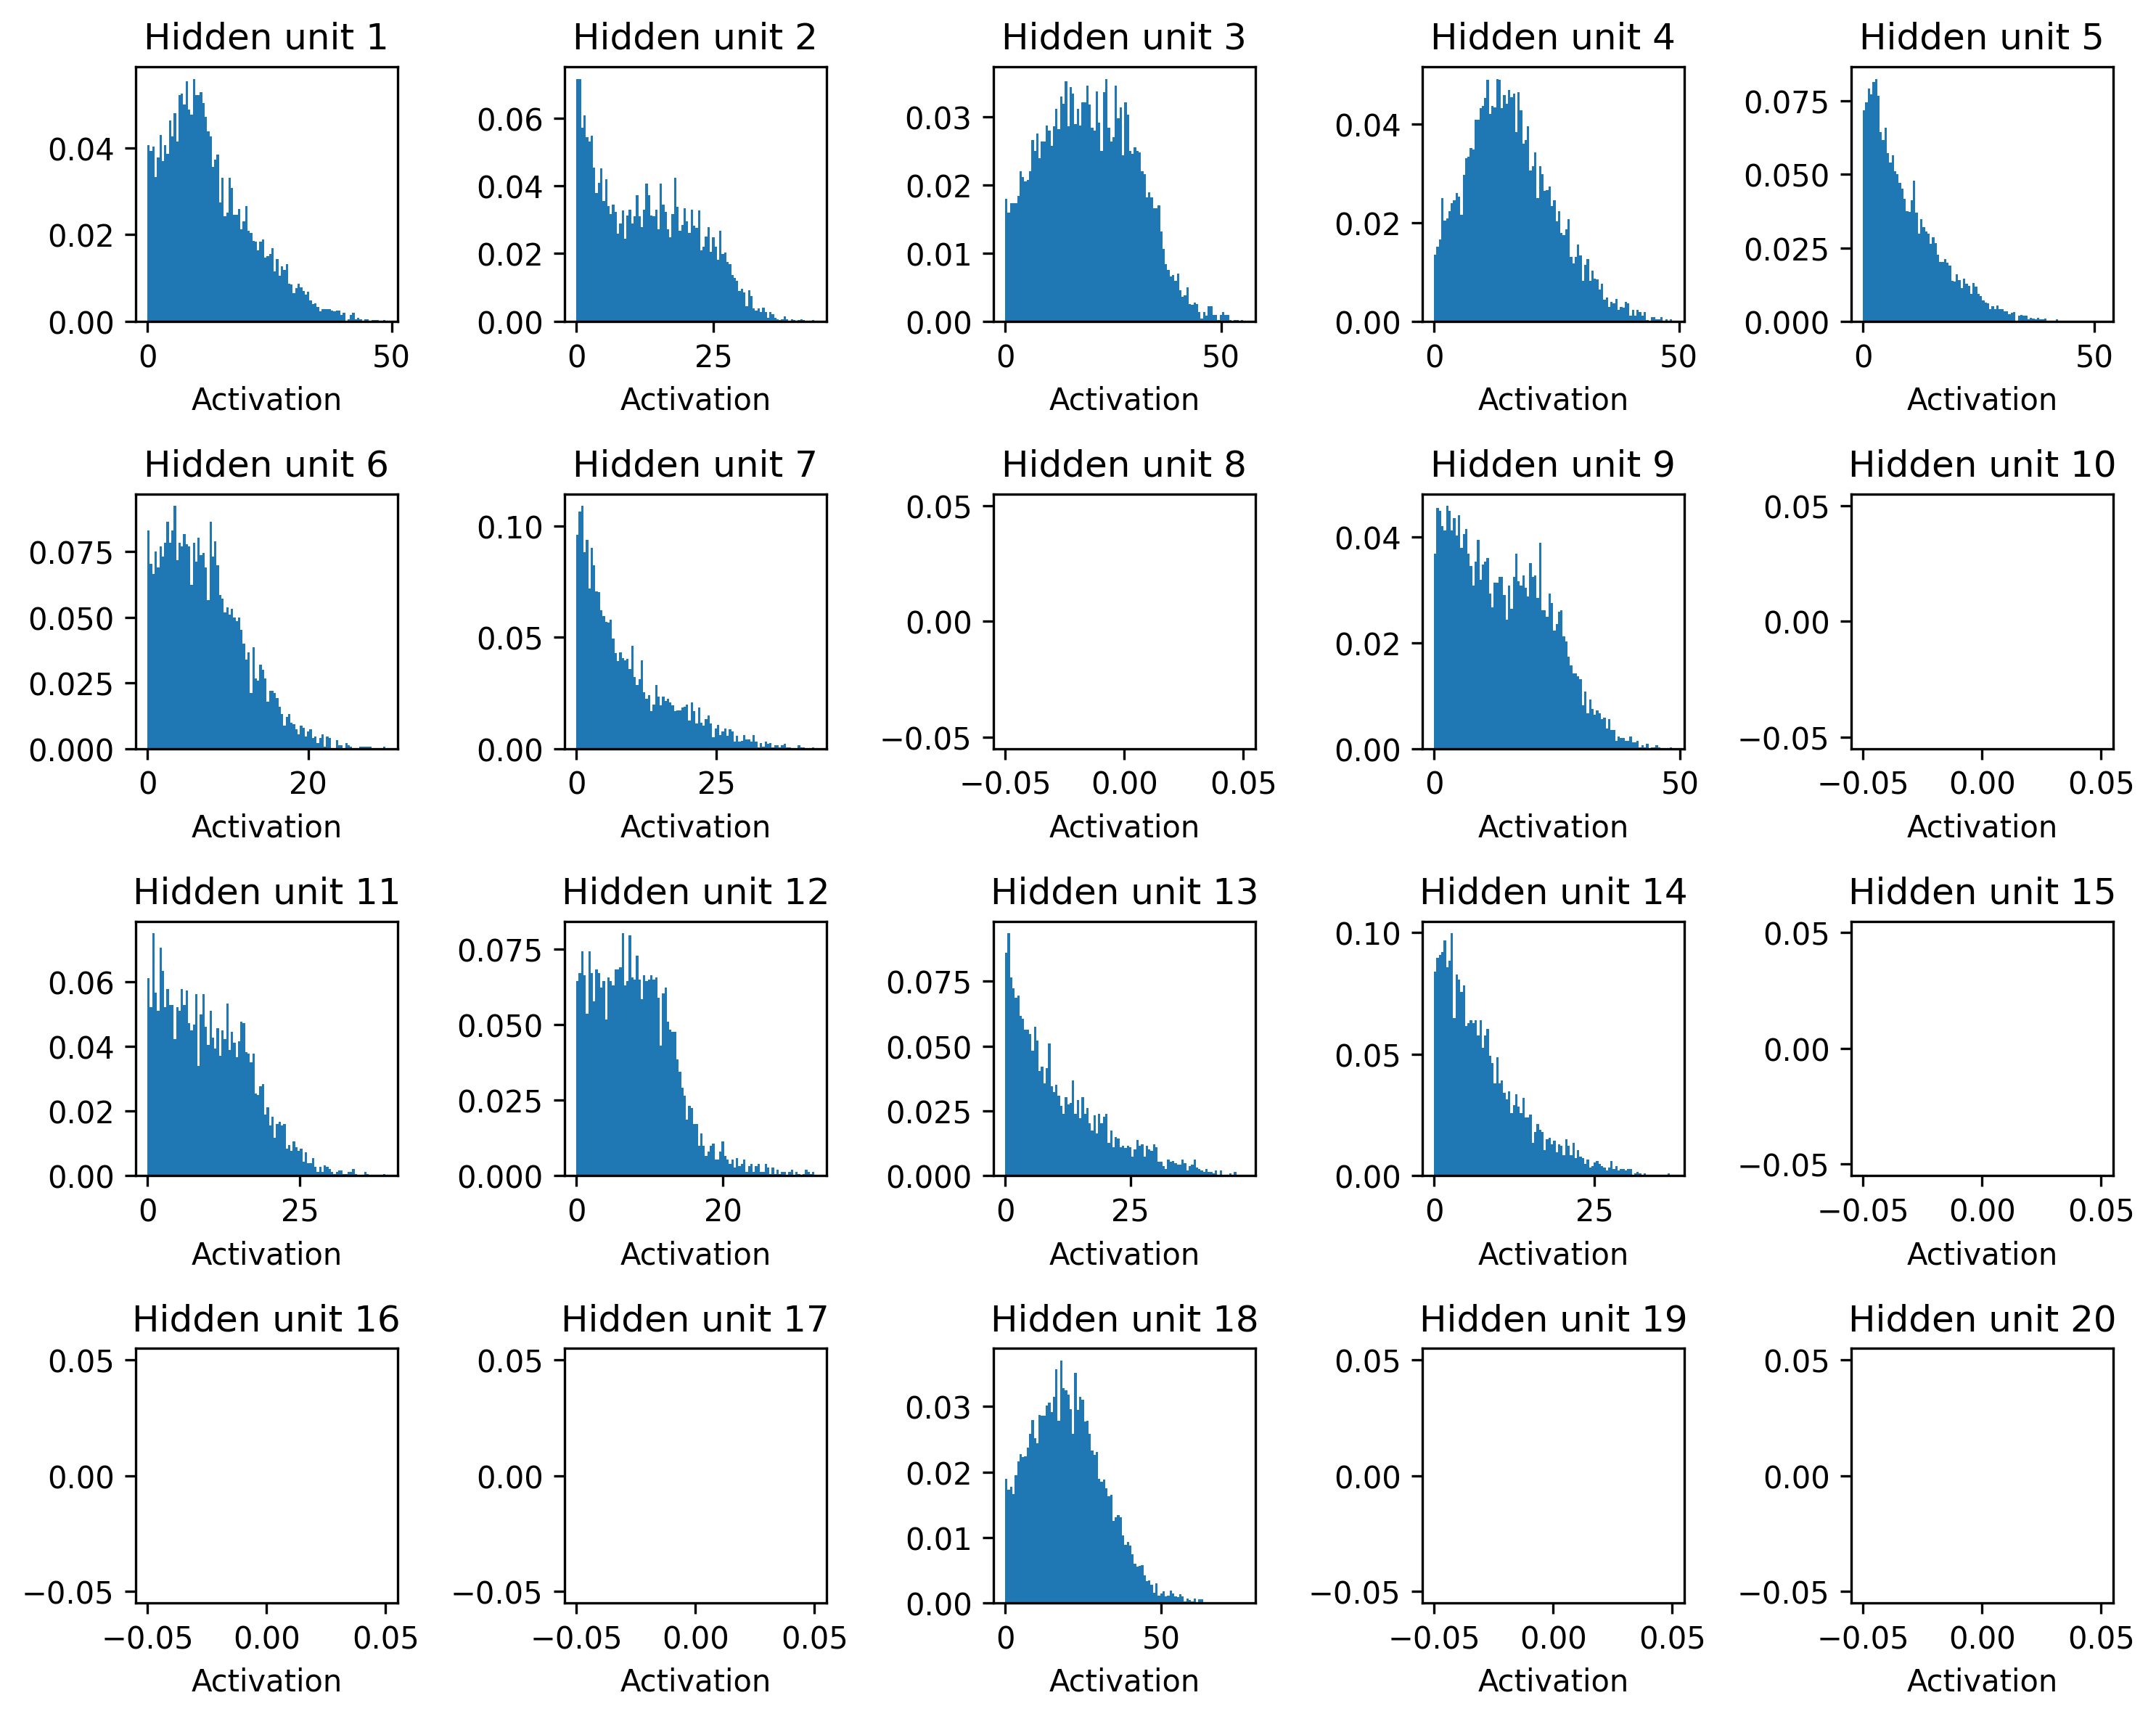

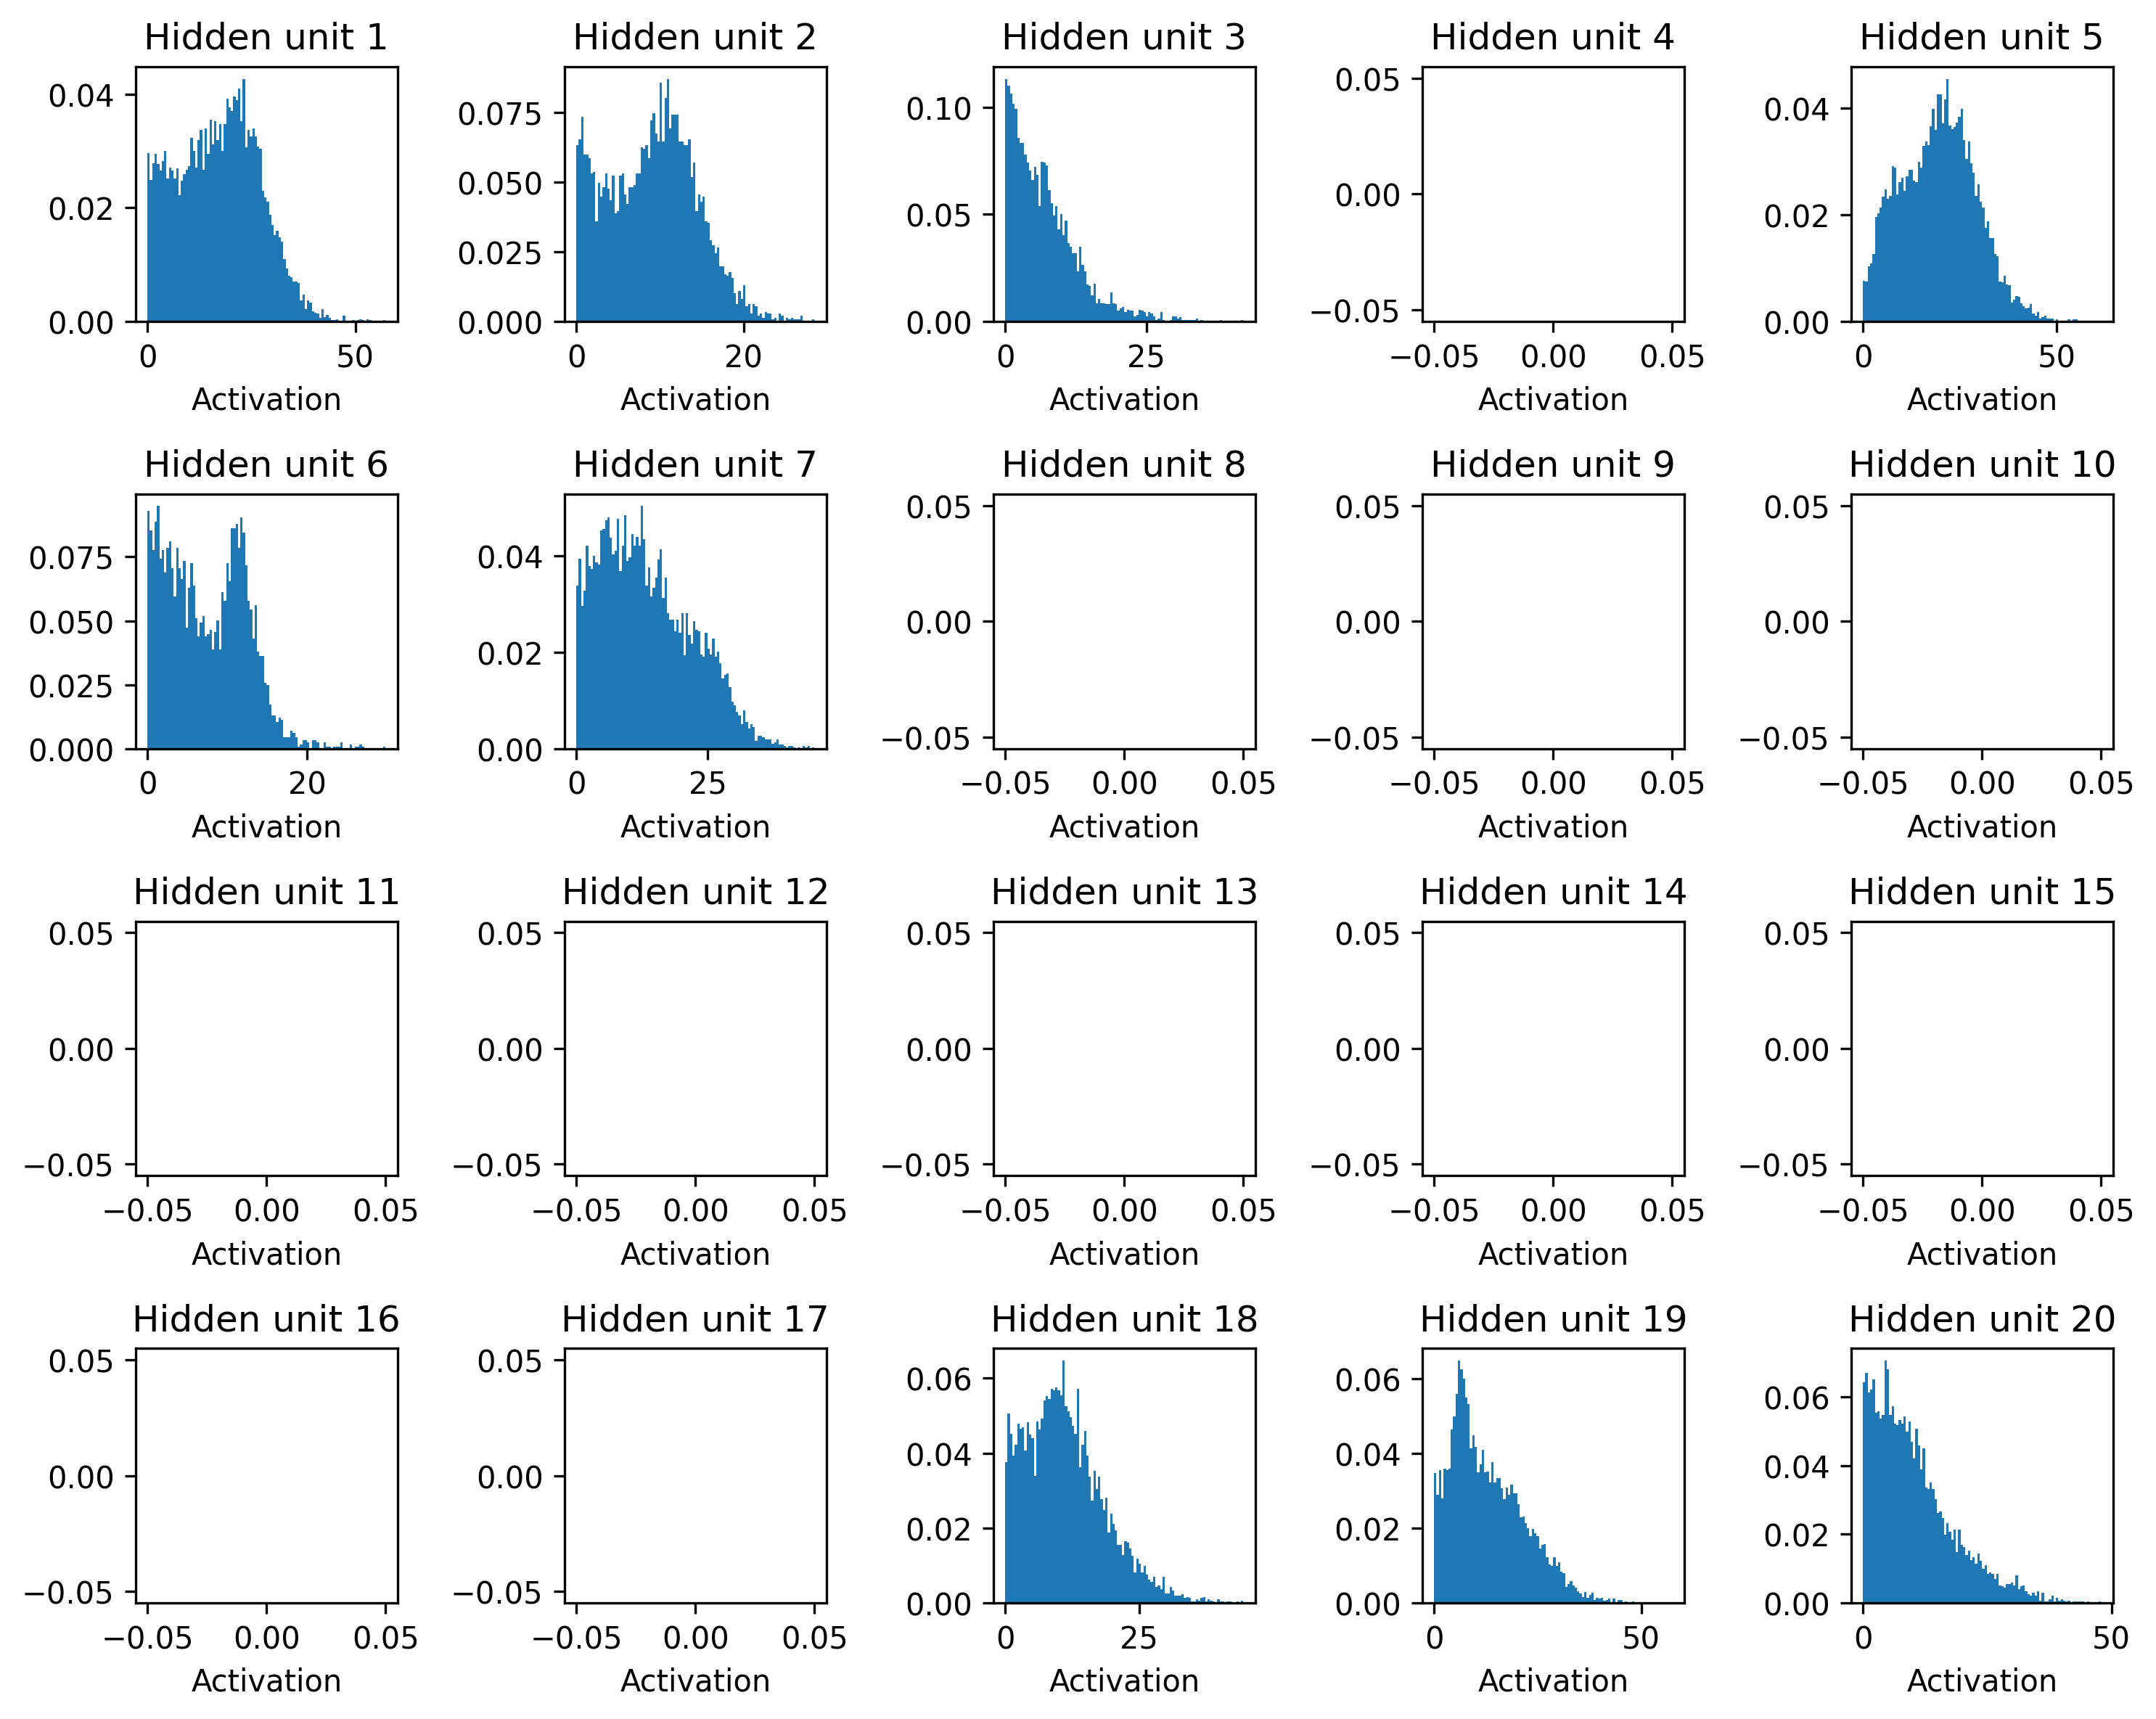

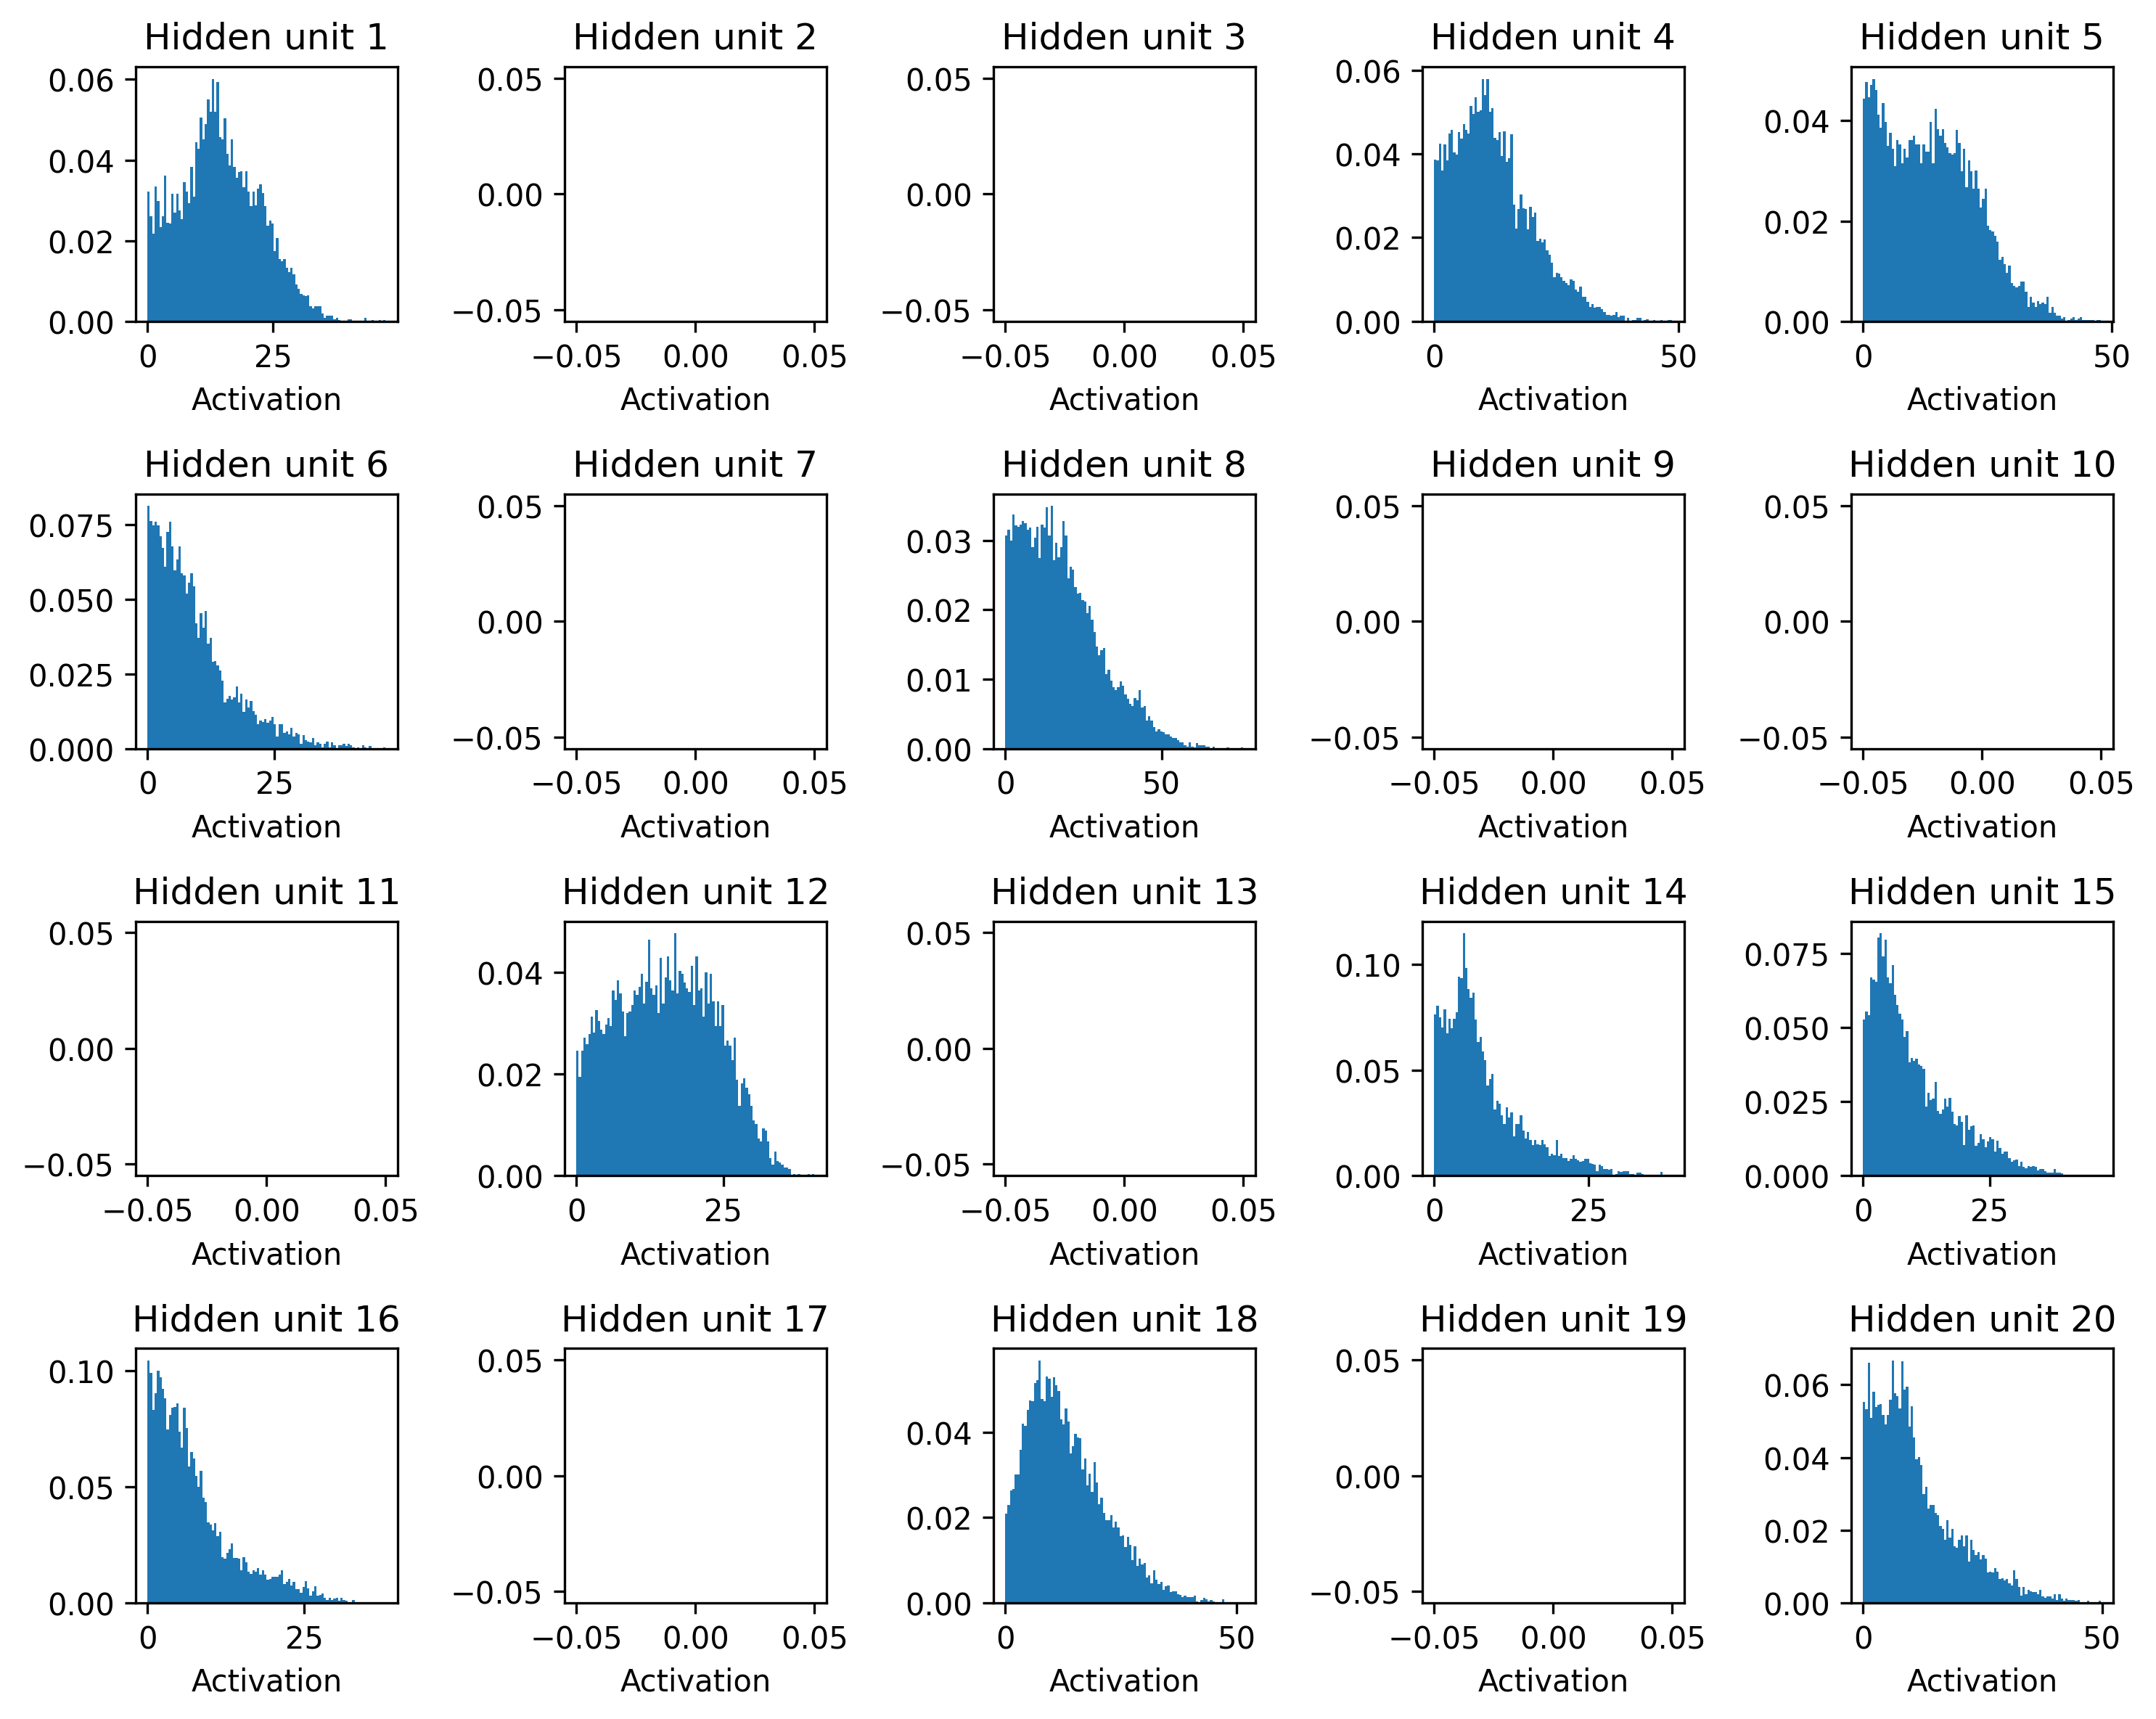

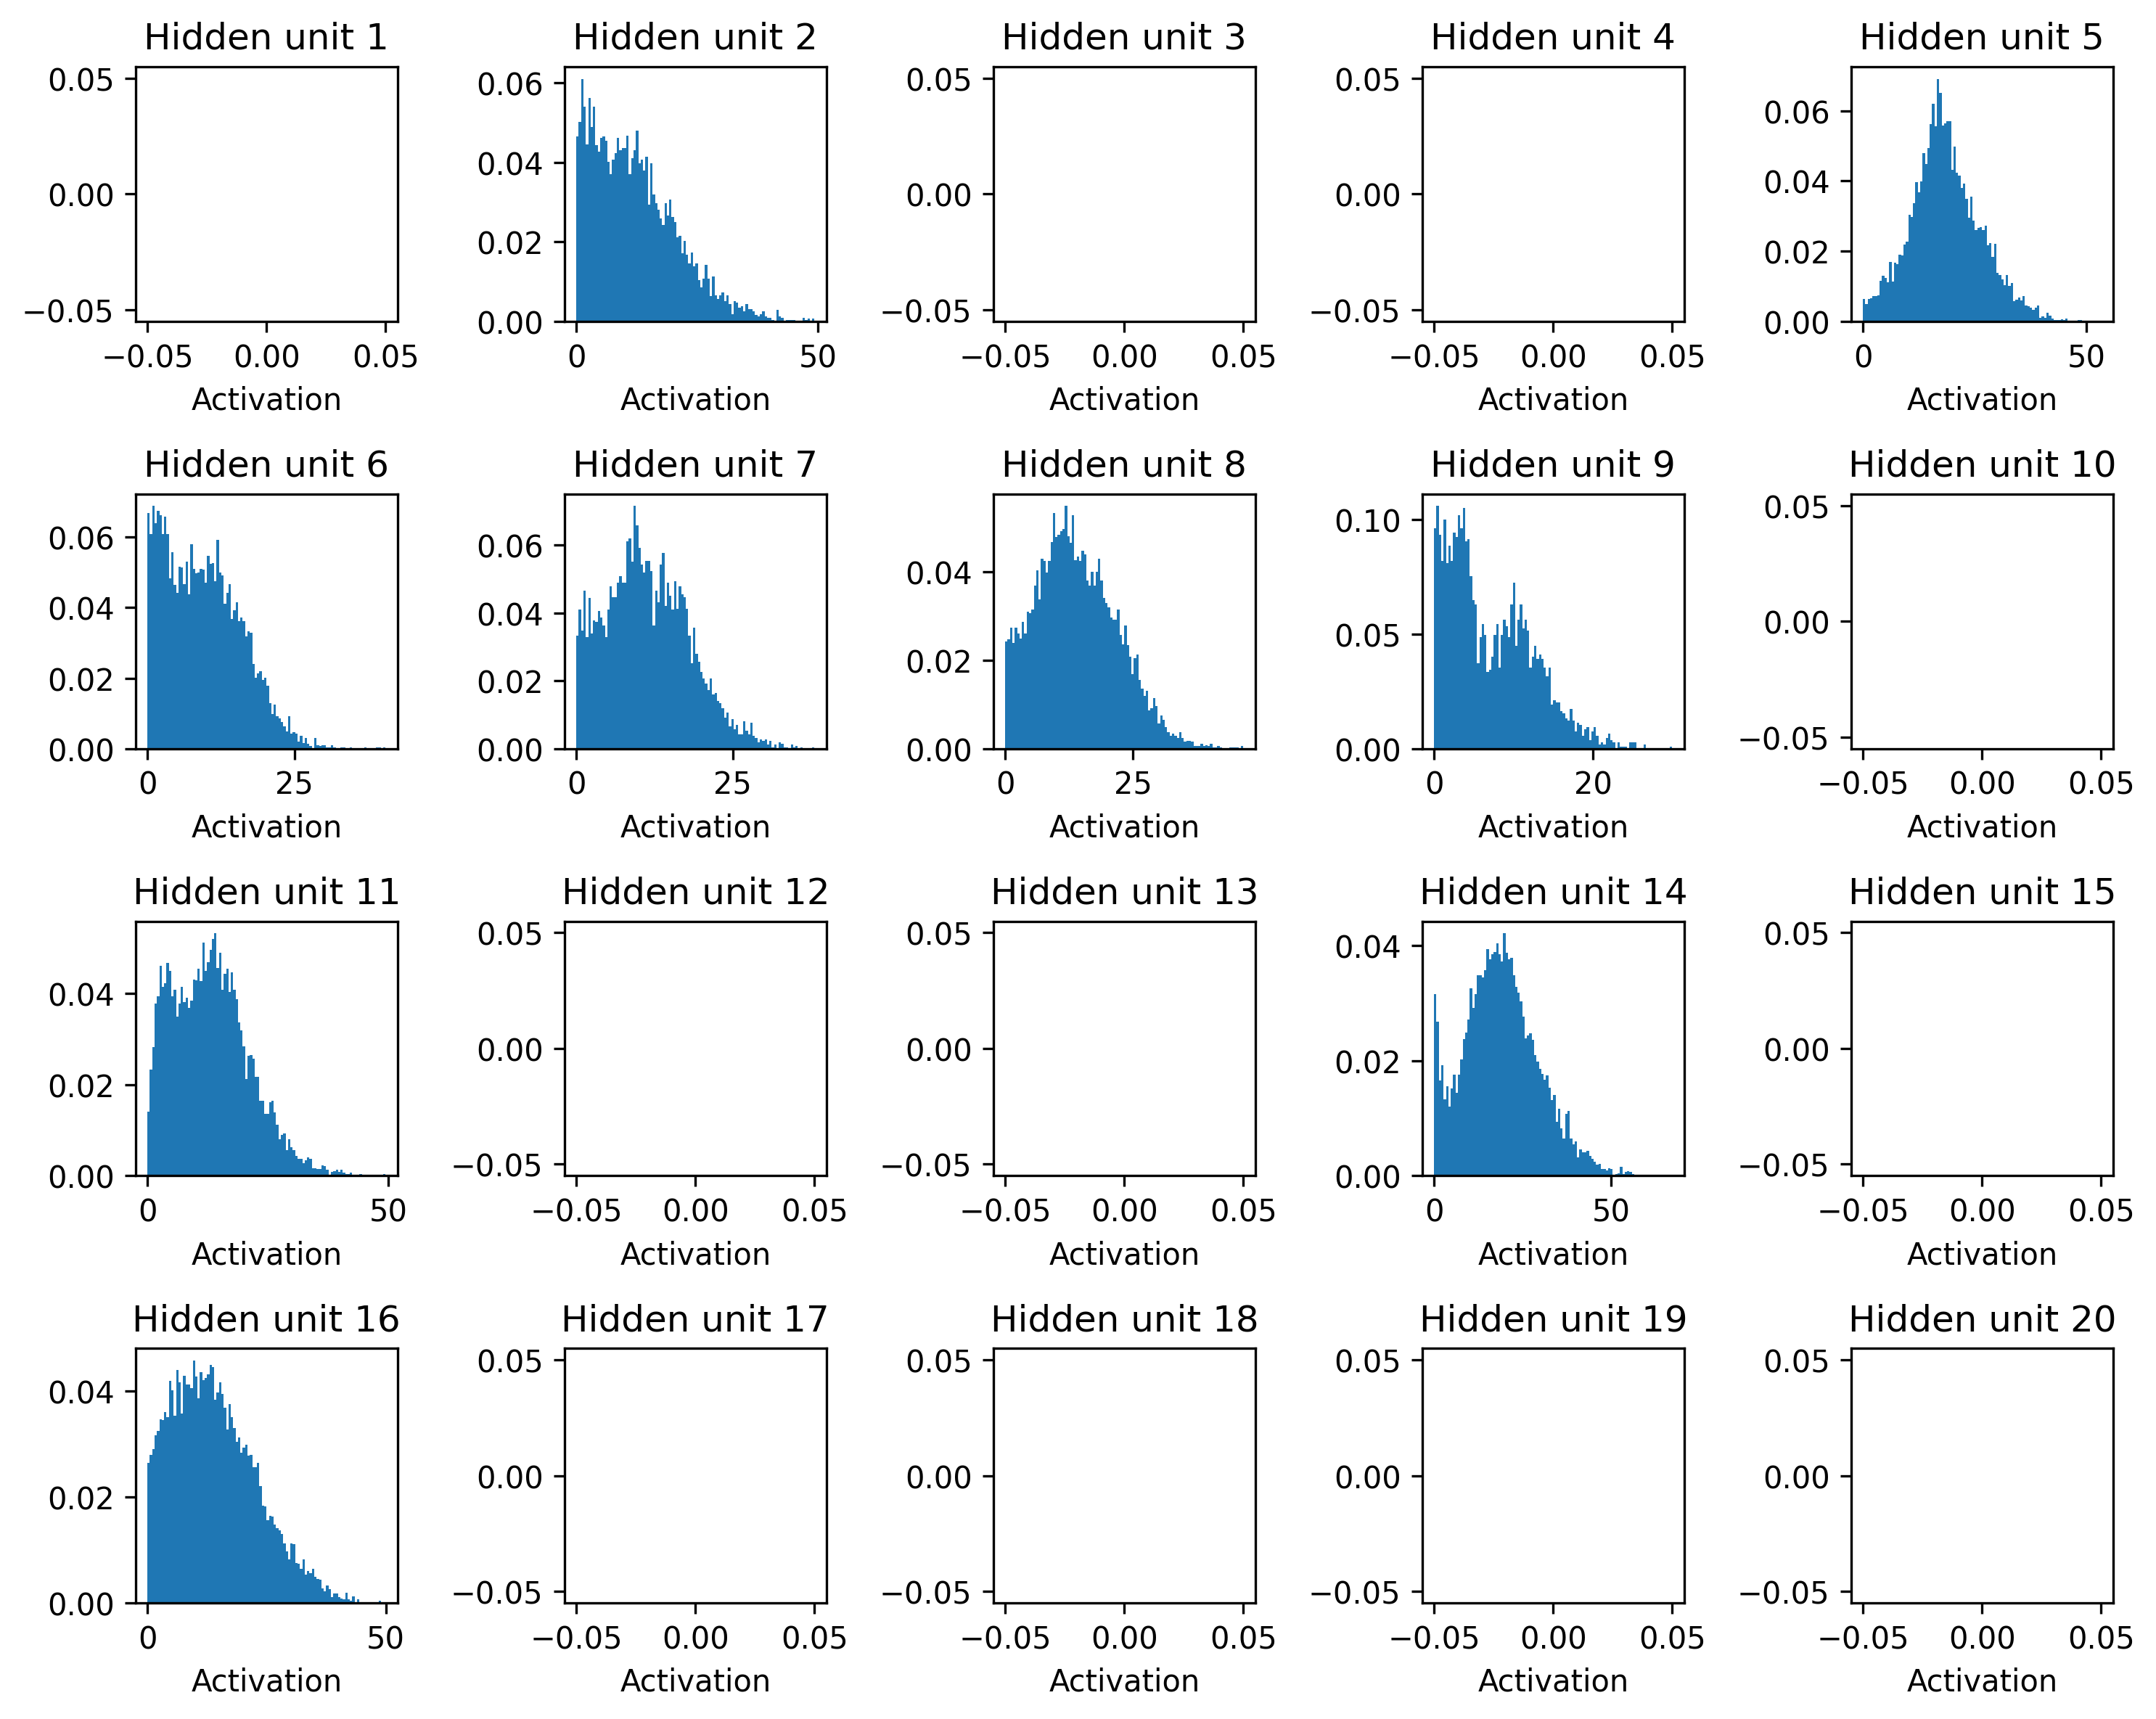

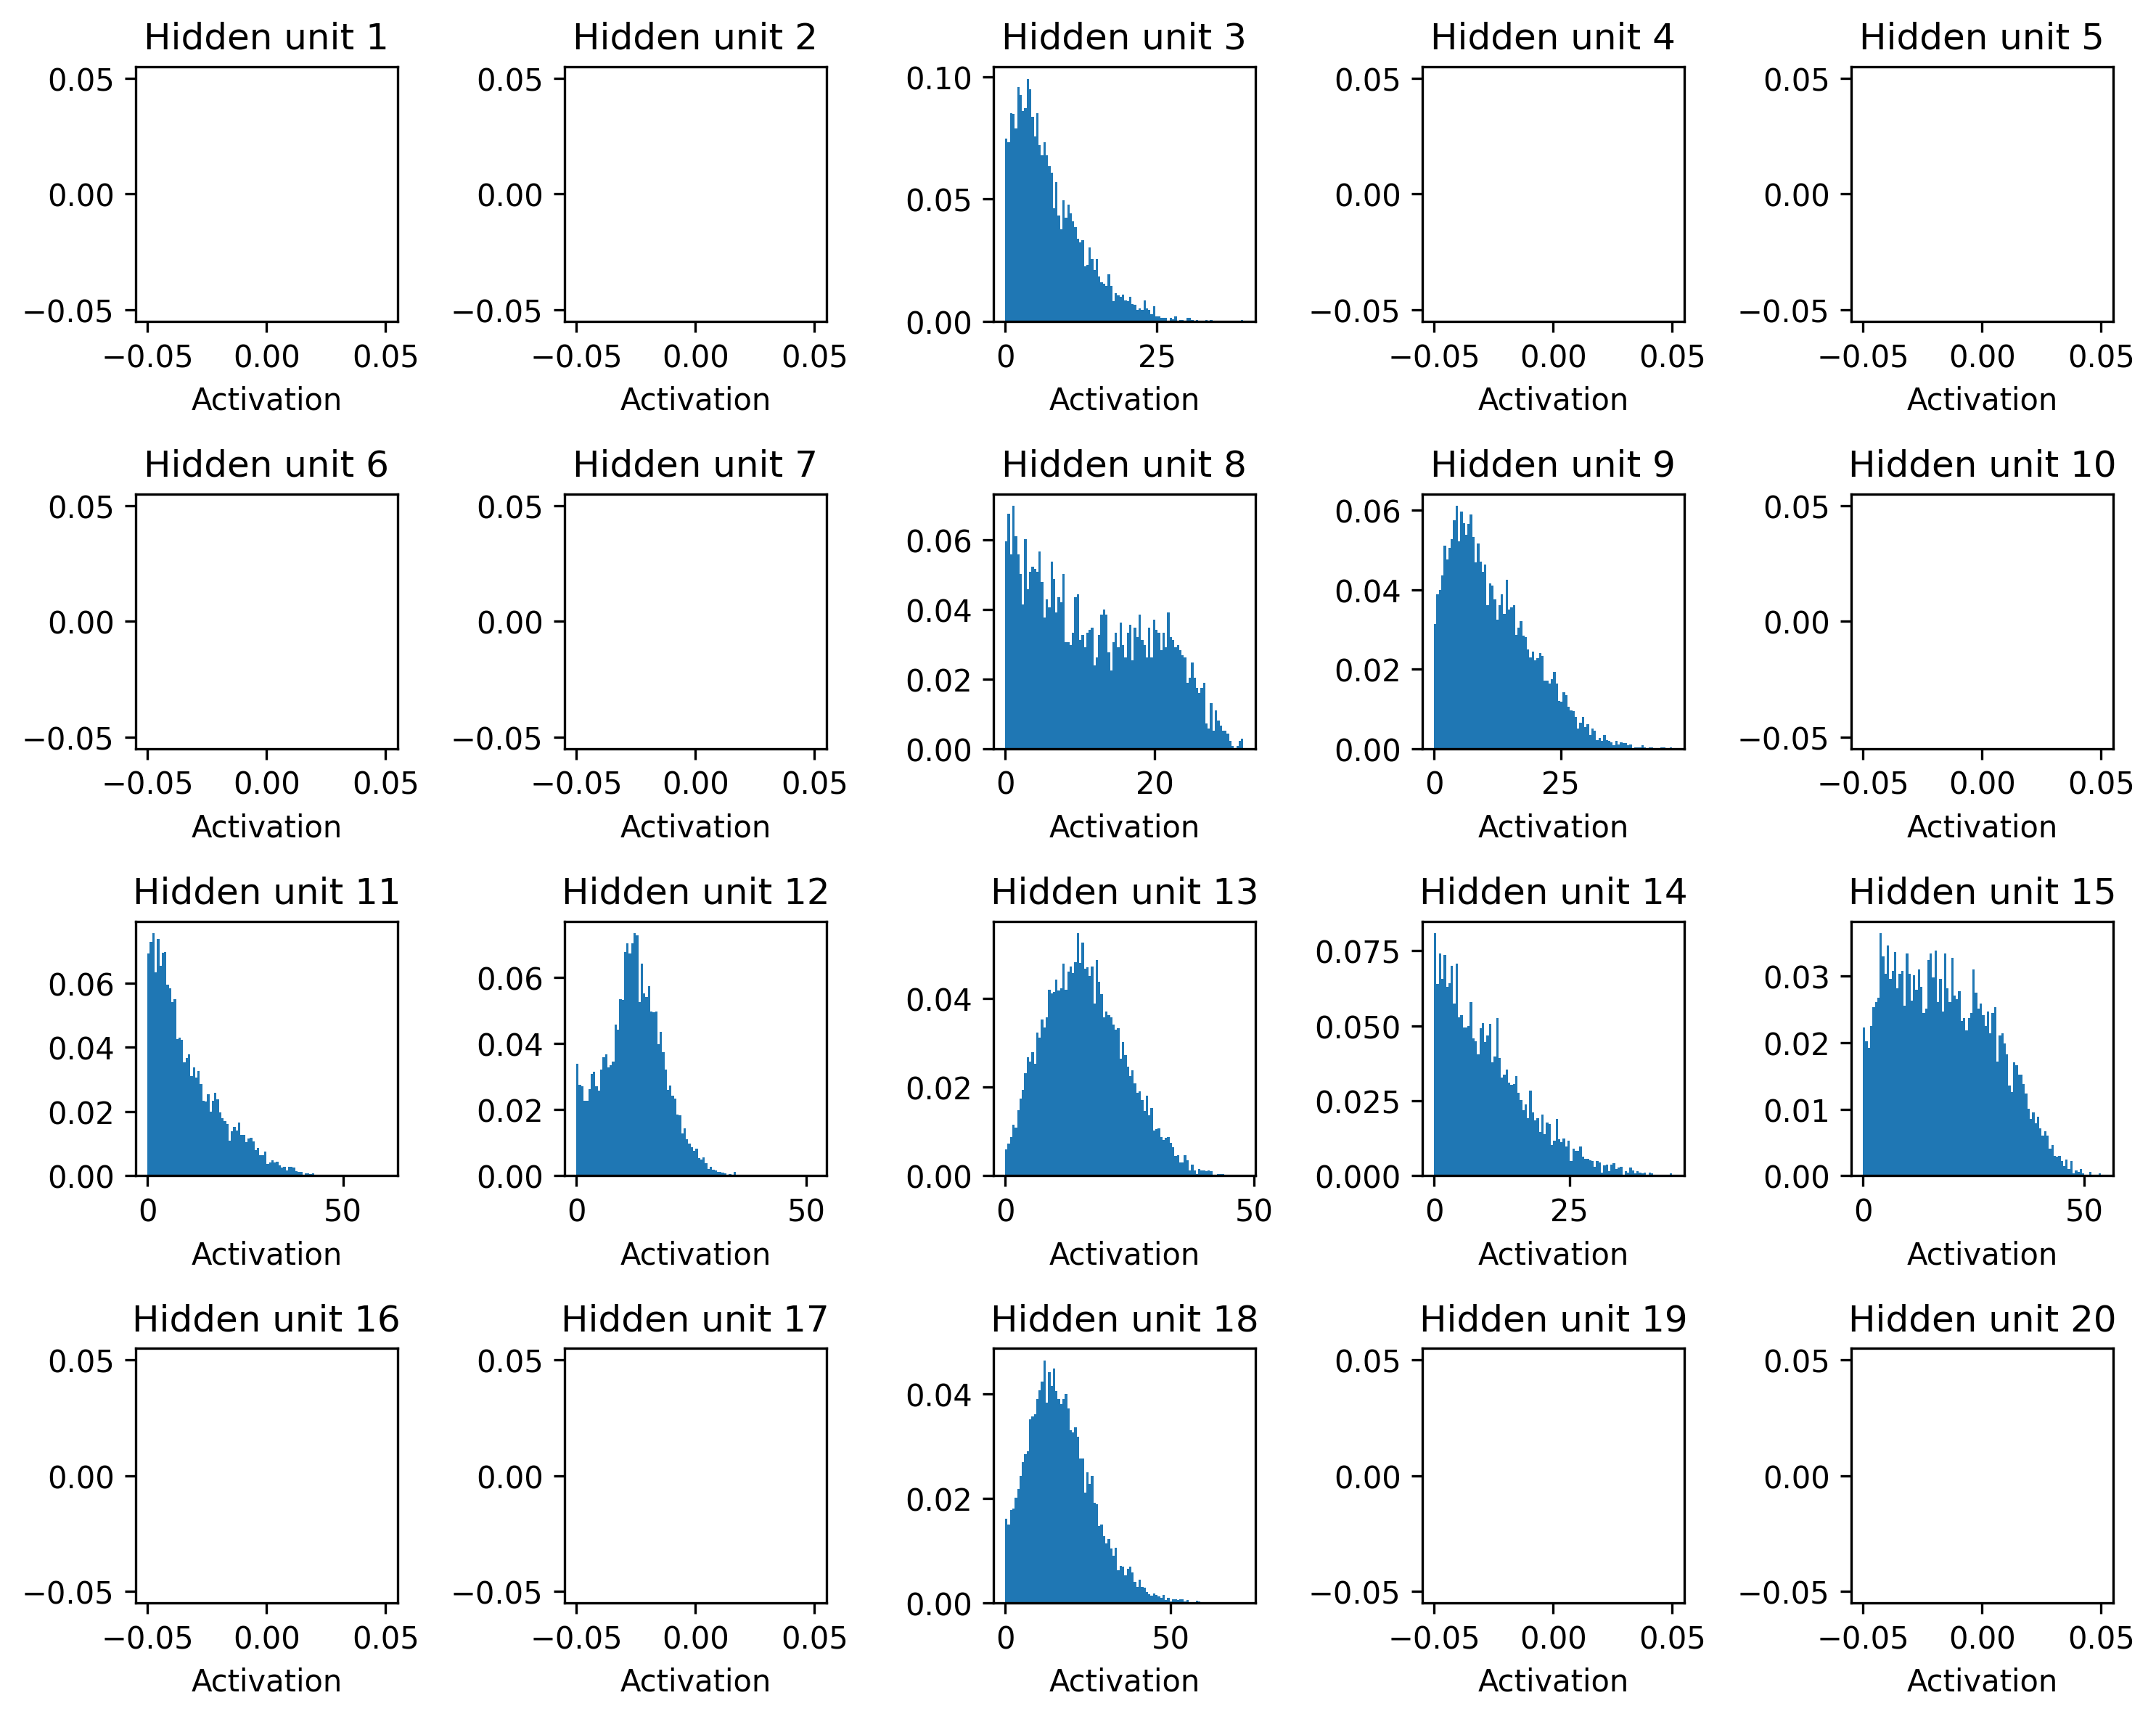

In [12]:
with open(file_name, 'rb') as f:
    results1 = pickle.load(f)[:15]
for i in range(5):
    model = results1[i]['model']
    plot_input_histogram_2NN(model, testloader)